## **I. Data Extraction and Data Visualization :**

**In this part we load the data and we verifie if it's clean, we visualize the data before adding some features**

In [73]:
from function2 import *

* Scraping data using the Binance API.

In [51]:
# Extraction Parameters
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY
start_date = '2023-01-01'
end_date = '2024-12-01'

# Extract Data
df = fetch_binance_data_full(symbol, interval, start_date, end_date)

# Save Data to a CSV File
output_file = "BTCUSDT_daily_2023.csv"
df.to_csv(output_file, index=False)
print(f"Data saved in {output_file}")

Data saved in BTCUSDT_daily_2023.csv


* Loads and prepares data from a CSV file.

In [52]:
# Load Data from CSV File
data_file = "BTCUSDT_daily_2023.csv"
df = pd.read_csv(data_file)

# Convert 'timestamp' Column to Datetime Format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Inspect Data
print(df.head())
print(df.info())

   timestamp      open      high       low     close        volume
0 2023-01-01  16541.77  16628.00  16499.01  16616.75   96925.41374
1 2023-01-02  16617.17  16799.23  16548.70  16672.87  121888.57191
2 2023-01-03  16672.78  16778.40  16605.28  16675.18  159541.53733
3 2023-01-04  16675.65  16991.87  16652.66  16850.36  220362.18862
4 2023-01-05  16850.36  16879.82  16753.00  16831.85  163473.56641
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  700 non-null    datetime64[ns]
 1   open       700 non-null    float64       
 2   high       700 non-null    float64       
 3   low        700 non-null    float64       
 4   close      700 non-null    float64       
 5   volume     700 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 32.9 KB
None


- Verifying the presence of missing (NaN) values in the dataset

In [53]:
df.isna().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

**Simple display of closing price**


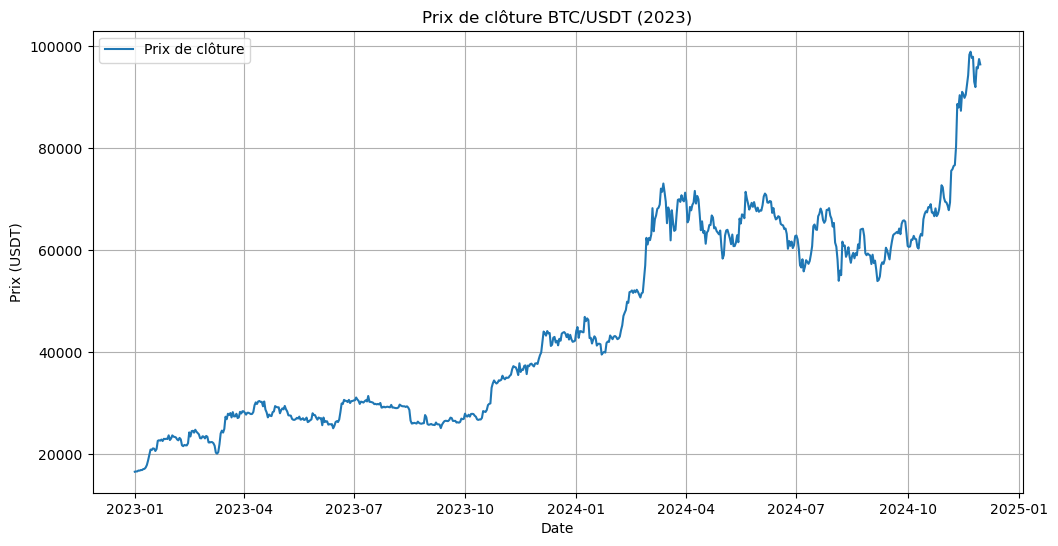

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Prix de clôture')
plt.title("Prix de clôture BTC/USDT (2023)")
plt.xlabel("Date")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.grid()
plt.show()

**Graph**: This graph shows a strong upward trend in BTC/USDT prices from 2023 to late 2024, with increased volatility toward the end. The sharp rise indicates bullish market sentiment, while the final dip suggests a potential correction.

## **II. Enhance the dataset with additional variables and prepare it for modeling**


**Enriching the database by adding indicators**:

- Relative Strength Index (**RSI**): Measures the speed and magnitude of price movements (momentum).
- Exponential Moving Average (**EMA**): A weighted moving average that prioritizes recent prices, useful for identifying trends.
- Average True Range (**ATR**): Measures market volatility.

These indicators are calculated over the last 14 days.


In [6]:
final_data = append_technical_indicators(df)
final_data

,timestamp,open,high,low,close,volume,RSI,EMA,ATR
0,2023-01-14,19930.01,21258.00,19888.05,20954.92,393913.74951,99.633998,18092.438235,495.185000
1,2023-01-15,20952.76,21050.74,20551.01,20871.50,178542.22549,97.301269,18462.979804,495.509643
2,2023-01-16,20872.99,21474.05,20611.48,21185.65,293078.08262,97.535299,18826.002497,521.728240
3,2023-01-17,21185.65,21647.45,20841.31,21134.81,275407.74409,96.083143,19133.843497,542.043366
4,2023-01-18,21132.29,21650.00,20407.15,20677.47,350916.01949,83.971533,19339.660364,592.100982
...,...,...,...,...,...,...,...,...,...
683,2024-11-27,91965.16,97208.21,91792.14,95863.11,41153.42734,66.866856,92408.160628,3710.402856
684,2024-11-28,95863.11,96564.00,94640.00,95643.98,28814.54357,66.307586,92839.603211,3582.802652
685,2024-11-29,95643.99,98619.99,95364.99,97460.00,27701.78231,68.647934,93455.656116,3559.388177
686,2024-11-30,97460.00,97463.95,96092.01,96407.99,14503.83306,65.796678,93849.300634,3403.141878


- To prepare for modeling, the data is normalized using the MinMax scaler.

In [7]:
scaled_data = apply_minmax_scaler(final_data)
scaled_data

,timestamp,open,high,low,close,volume,RSI,EMA,ATR
0,2023-01-14,0.004759,0.021351,0.004235,0.017564,0.558635,1.000000,0.000000,0.000000
1,2023-01-15,0.017537,0.018761,0.012518,0.016522,0.247428,0.971200,0.004863,0.000091
2,2023-01-16,0.016541,0.024050,0.013273,0.020447,0.412930,0.974090,0.009627,0.007468
3,2023-01-17,0.020447,0.026217,0.016145,0.019812,0.387397,0.956161,0.013666,0.013184
4,2023-01-18,0.019780,0.026249,0.010721,0.014098,0.496505,0.806633,0.016367,0.027267
...,...,...,...,...,...,...,...,...,...
683,2024-11-27,0.904761,0.970267,0.902599,0.953461,0.048905,0.595460,0.975251,0.904606
684,2024-11-28,0.953461,0.962218,0.938180,0.950724,0.031075,0.588555,0.980913,0.868705
685,2024-11-29,0.950724,0.987906,0.947238,0.973413,0.029467,0.617449,0.988997,0.862117
686,2024-11-30,0.973413,0.973462,0.956321,0.960269,0.010396,0.582247,0.994163,0.818157


# **III. Building models to forecast the closing price of the stock.**

## **III.1  Simple Linear Regression** 

In [8]:
# Setting up parameters for a prediction model. Here, the goal is to predict the closing price 60 days in the future using the closing 
#price as the regressor.

prediction_time = 60 # We want to predict the close price 60 days Later 
regressor = ['close'] # We choose One regressor which is the colse price itself
price, target  = preprocess_for_regression(scaled_data, regressor, prediction_time) # Data Processing for the model

- Let’s perform regression analysis and visualize the results.

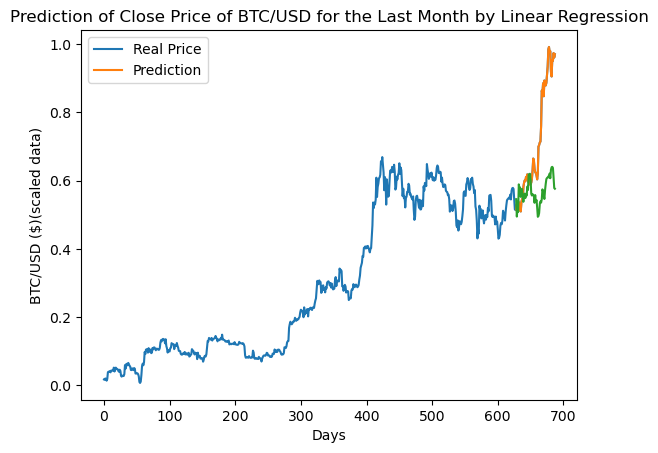

In [9]:
# Performing linear regression on the data.
regression_matrix, future_price, simple_r2 = apply_linreg(scaled_data, prediction_time, price, target, regressor)
# Plotting the model's performance on a graph.
plot_model_predictions(regression_matrix, scaled_data)

- We zoom in for better visibility.

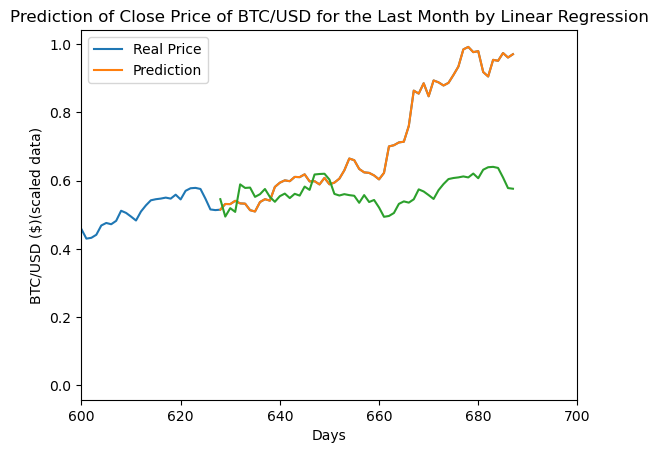

In [10]:
plot_model_predictions(regression_matrix, scaled_data, zoom_range = [600, 700])

- We calculated the R² indicator to assess the model's accuracy and relevance.

In [11]:
# Showing the R-squared value for the simple linear regression model.
simple_r2

0.7067857137700222

- The predicted values follow the general trend of the real prices but show noticeable deviations.  

- The R² value indicates a moderate fit, suggesting the model captures some but not all price dynamics.  

- The simplicity of the linear regression may limit its ability to fully capture the complexity of price movements. 
 
- Using additional variables or more sophisticated models could enhance prediction accuracy.

Visualization of predictions for the next 60 days, representing the beginning of 2025.

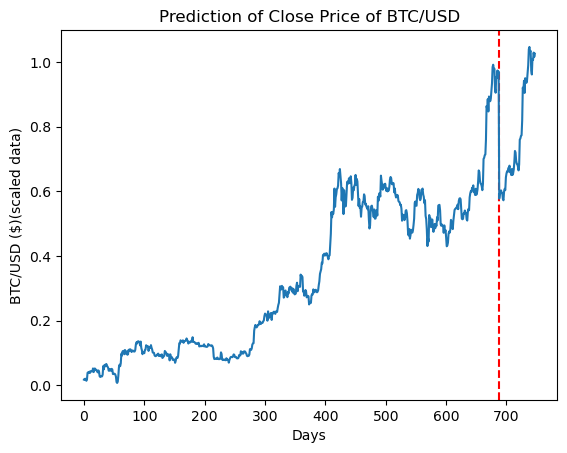

In [12]:
# Plotting the model's future price predictions.
plot_future_predictions(scaled_data, future_price)

The chart predicts a sharp rise in BTC/USD after day 700 but shows a significant dip right after the prediction starts, highlighting potential instability or overfitting in the linear regression model.

## **2. Multiple linear regression.**

- Performing variable selection for multiple linear regression using the correlation matrix.

<function matplotlib.pyplot.show(close=None, block=None)>

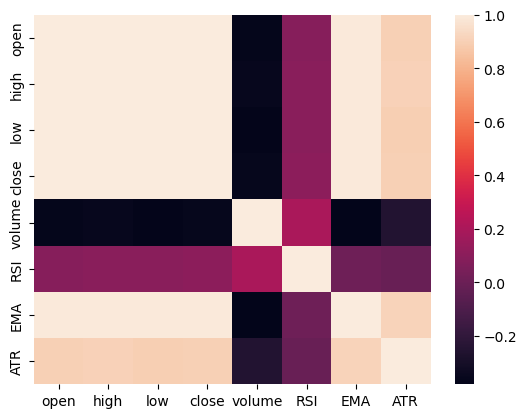

In [13]:
# Generating a correlation matrix.
corr_matrix = final_data.drop('timestamp', axis=1).corr()

# Correlations are visually represented through a heatmap generated with seaborn.
sns.heatmap(corr_matrix)
plt.show

In [14]:
# Identifying feature correlations with the 'close' column using the correlation matrix.
corr_matrix['close']

open      0.997544
high      0.999207
low       0.998742
close     1.000000
volume   -0.363219
RSI       0.104430
EMA       0.992746
ATR       0.899056
Name: close, dtype: float64

The Close Price appears to have a relatively strong correlation with the EMA and ATR indicators, making them suitable additions to the regression model.

In [15]:
# Adding 'close,' 'ATR,' and 'EMA' as key features for preprocessing the data.
regressor = ['close', 'ATR', 'EMA']
price, target  = preprocess_for_regression(scaled_data, regressor, prediction_time) 

**Apply Multiple Linear Regression**

In [21]:

regression_matrix, future_price, mult_r2 = apply_linreg(scaled_data, prediction_time, price, target, regressor)

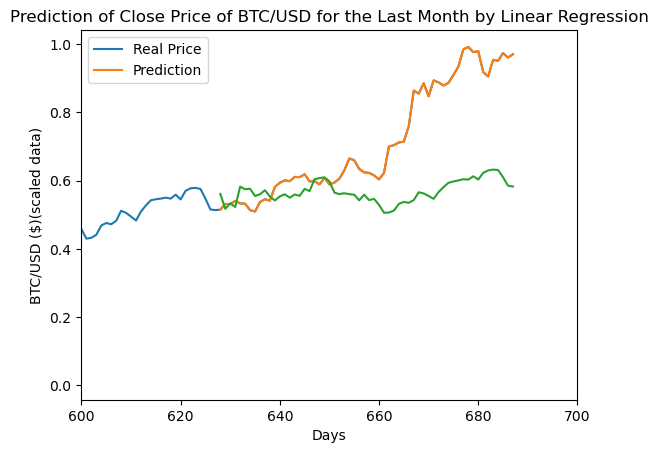

In [22]:
# Plotting the linear regression model's performance.
plot_model_predictions(regression_matrix, scaled_data, zoom_range=[600,700])

In [23]:
# Comparing the R-squared values of the multivariate model ('mult_r2') to those of the simple model ('simple_r2').
mult_r2, simple_r2

(0.7398771837582672, 0.7067857137700222)

-  The model underestimates the sharp price increase post-day 660, showing limits in handling rapid changes.

- Adding variables naturally increases the R², but this doesn’t guarantee a better model, especially since the improvement here is minimal.

- **Suggestion**: Consider non-linear models and additional evaluation metrics.

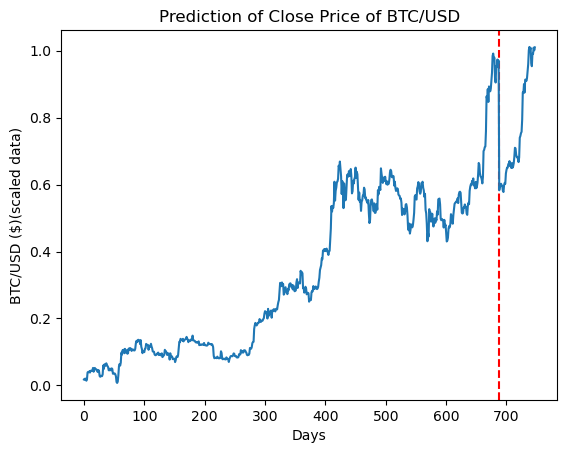

In [24]:
plot_future_predictions(scaled_data, future_price)

The model continues to exhibit a significant dip right at the start of the 2025 prediction, highlighting a recurring problem of instability or overfitting. It is, nevertheless, slightly less pronounced than in the simple linear regression.

## **3. Suport Vector Regression**

- First, the optimal parameters for the SVR model are determined through Cross-Validation.

In [25]:
# Defining a grid of values for 'C' and 'gamma' to optimize hyperparameters in SVM models.

param_grid = {'C': [10**i for i in range(2, 11)], 
              'gamma' : [10**(-i) for i in range(2, 11)]} # Creat a dictionnary of parameters

In [26]:
# Dividing the price and target data into training and test sets, allocating 70% of the data for training.
price_train, _, target_train, _ = train_test_split(price, target, test_size = 0.3)

# The 'cross_validation_parameter' function is utilized to identify the optimal 'C' and 'gamma' values for the model, likely employing a grid search method.
best_C, best_gamma = find_best_hyperparameters(param_grid, price_train, target_train)

In [27]:
print(f'The best values are {best_C} for C and {best_gamma} for Gamma')

The best values are 100000 for C and 0.01 for Gamma


- Applying and plotting of the SVR

In [28]:
# Applying a Support Vector Regression (SVR) model with the best 'C' and 'gamma' values found. 
svr_matrix, future_price, r2_svr = apply_svr_model(scaled_data, prediction_time, price, target, regressor, best_C, best_gamma)

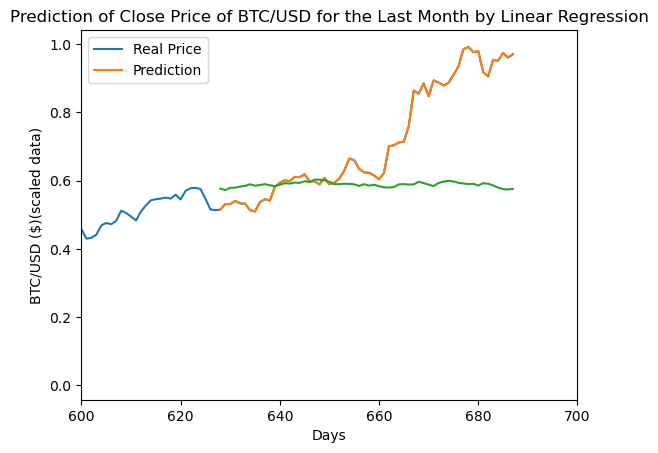

In [30]:

plot_model_predictions(svr_matrix, scaled_data, zoom_range = [600, 700])

In [31]:
# Displaying the accuracy score of the SVR model.
r2_svr

0.791312460491384

- **Model Performance:** SVR slightly outperforms the linear regression models but still struggles to capture the sharp upward trend . The 

improvement over linear regression is minimal, highlighting potential limitations in feature selection or model 

tuning.  The improvement in R² is modest and does not fully address the prediction gap.

- **Suggestion:** SVR may have limitations with certain data or dynamics, so we are going to try more flexible models.

**Prediction for early 2025**

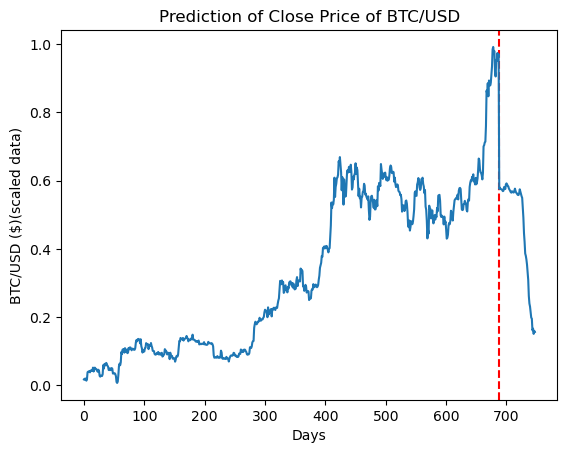

In [32]:
plot_future_predictions(scaled_data, future_price)

**Conclusion :**  The predictions for late 2024 and early 2025 are highly unreliable, showing an unrealistic sharp decline into negative 

values, which is inconsistent with the market context. This highlights serious limitations in the model's ability to capture and generalize future trends.

## **4.  Long short-term memory Model (LSTM)**

The **LSTM** model is a type of deep learning architecture designed for time series prediction. It features memory cells that utilize a set of 

gates to manage information flow. The input gate, forget gate, and output gate work together to determine which information is stored, 

discarded, or passed on, enabling the model to handle sequential data efficiently by selectively retaining or forgetting details.

In [33]:
# Defining the sequence length for time series forecasting.
sequence_length = 20 

The neural network is trained by pairing each value with the value that occurs 20 steps later, enabling it to learn patterns for making predictions.

In [34]:
# Generating sequences from the scaled data based on the defined sequence length.
X, y = generate_sequences(scaled_data, sequence_length) # Predictions are made using a time horizon of 20 periods (e.g., 20 days or 20 hours).
# The LSTM is trained on the sequences and makes predictions through the 'lstm_model' function.
y_train, y_test, predicted_values = build_lstm_model(X, y)

Epoch 1/100


2024-12-27 15:16:59.087707: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0956
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0382 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0122 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0102 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0150 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0099 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0044 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0052 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0059 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0054 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0037 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0022 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0023 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0034 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0029 
Epoch 16/100
2/2 

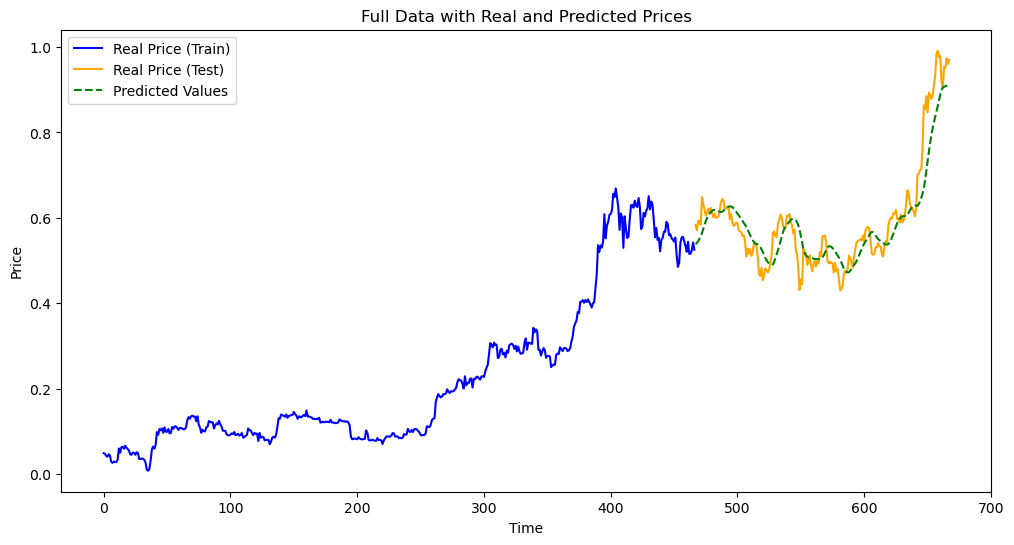

In [35]:
plot_rnn_predictions(y_train, y_test, predicted_values)

- While the prediction aligns well with the close price, it smooths out variations but retains the key peaks and drops, which are essential for a trader. The smoothing effect, though, results in the drop being delayed.

**Now, to improve our model, the next step is to use it for making hourly predictions tailored for day trading.**


- We will now move on to extracting hourly data using the Binance API.


In [48]:
# Paramètres de l'extraction
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1HOUR
start_date = '2023-01-01'
end_date = '2024-12-01'

# Extraire les données
df = fetch_binance_data_full(symbol, interval, start_date, end_date)

# Sauvegarder les données dans un fichier CSV
output_file = "BTCUSDT_hourly_2023.csv"
df.to_csv(output_file, index=False)
print(f"Données sauvegardées dans {output_file}")

# Charger les données depuis le fichier CSV
data_file = "BTCUSDT_hourly_2023.csv"
df = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vérifier les données
print(df.head())
print(df.info())

Données sauvegardées dans BTCUSDT_hourly_2023.csv
            timestamp      open      high       low     close      volume
0 2023-01-01 00:00:00  16541.77  16545.70  16508.39  16529.67  4364.83570
1 2023-01-01 01:00:00  16529.59  16556.80  16525.78  16551.47  3590.06669
2 2023-01-01 02:00:00  16551.47  16559.77  16538.14  16548.19  3318.84038
3 2023-01-01 03:00:00  16548.19  16548.19  16518.21  16533.04  4242.08050
4 2023-01-01 04:00:00  16533.04  16535.97  16511.92  16521.85  4285.00909
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  16799 non-null  datetime64[ns]
 1   open       16799 non-null  float64       
 2   high       16799 non-null  float64       
 3   low        16799 non-null  float64       
 4   close      16799 non-null  float64       
 5   volume     16799 non-null  float64       
dtypes: datetime64[ns]

In [49]:
# Charger les données depuis le fichier CSV
data_file = "BTCUSDT_hourly_2023.csv"
df = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vérifier les données
print(df.head())
print(df.info())

            timestamp      open      high       low     close      volume
0 2023-01-01 00:00:00  16541.77  16545.70  16508.39  16529.67  4364.83570
1 2023-01-01 01:00:00  16529.59  16556.80  16525.78  16551.47  3590.06669
2 2023-01-01 02:00:00  16551.47  16559.77  16538.14  16548.19  3318.84038
3 2023-01-01 03:00:00  16548.19  16548.19  16518.21  16533.04  4242.08050
4 2023-01-01 04:00:00  16533.04  16535.97  16511.92  16521.85  4285.00909
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  16799 non-null  datetime64[ns]
 1   open       16799 non-null  float64       
 2   high       16799 non-null  float64       
 3   low        16799 non-null  float64       
 4   close      16799 non-null  float64       
 5   volume     16799 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 787.6 KB
None


In [50]:
data_file = "BTCUSDT_hourly_2023.csv"
hour_data = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
hour_data['timestamp'] = pd.to_datetime(hour_data['timestamp']) 
hour_btc = scaling_data(hour_data)

**We can now apply the model to this dataset, expecting improved predictions compared to the previous example due to the increased amount of data provided.**

Epoch 1/100


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0384
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0012
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 7.8649e-04
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 6.5322e-04
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 5.4229e-04
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 5.3909e-04
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 4.5565e-04
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 4.3058e-04
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 3.9241e-04
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 3.6516e-04
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 3.3989e-04
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 3.6343e-04
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 3.5501e-04
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 3.3155e-04
Epoch 15/100
34/34 ━━

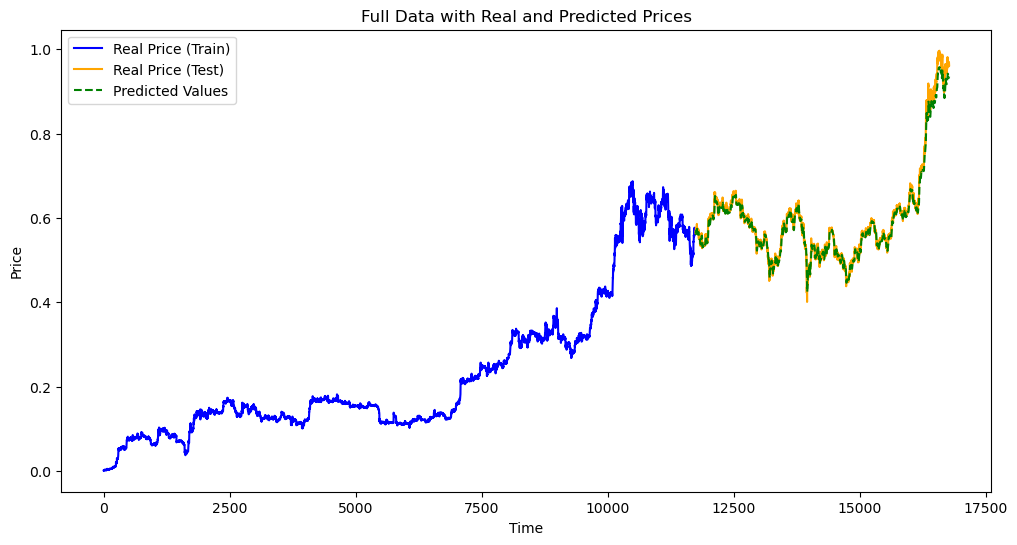

In [55]:
# Setting the sequence length for LSTM model, creating sequences from the hourly data, and applying the LSTM model to this data.
sequence_length = 20
X, y = generate_sequences(hour_btc, sequence_length) # Prediction based on 20 hours 
y_train, y_test, predicted_values = build_lstm_model(X, y)
plot_rnn_predictions(y_train, y_test, predicted_values)

- The predictions align well with the actual values, as expected ! However, with a significantly large number of data points, we observe that this function takes considerably more time to execute compared to the others.

The next phase is more complex, pushing the boundaries of what this model can do. We will implement recursive prediction with LSTM, where each predicted value is used to forecast the subsequent one. This technique is important because, in earlier examples, the model was able to accurately predict future values since it used the true value for each step. However, in this case, we lack the true values for future predictions.

In the following example, we will forecast the prices for the next 5 hours.

In [56]:
t = 5
X, y = create_sequences_recursive(hour_btc, sequence_length)
prediction = recursive_lstm_prediction(X, y, t)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0540
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0022
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0016
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0013
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0012
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0010
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 9.3446e-04
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 8.7622e-04
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 8.0124e-04
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 7.3491e-04
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 6.7498e-04
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 6.1932e-04
Epoch 13/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 6.0100e-04
Epoch 14/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 6.0660e-04
Epoch 15/100
48/48 ━━━━━━

In [57]:
prediction = reverse_scaling(prediction, hour_data)

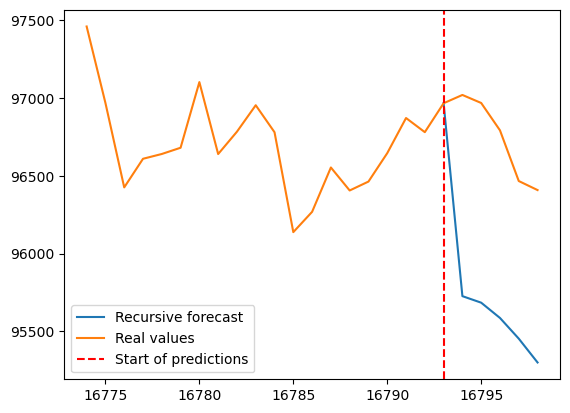

In [58]:
#Visualizing the results of the recursive prediction.

#The red dashed line at 'sequence_length' shows where the recursive prediction begins in the time series.
N = len(hour_data['close'])
x_indices = np.arange(N - sequence_length-5, N - sequence_length + len(prediction)-5)

plt.plot(x_indices[-6:], prediction[-6:], label='Recursive forecast')
plt.plot(x_indices, hour_data['close'][-25:], label='Real values')
plt.axvline(x=N-6, color='r', linestyle='--', label='Start of predictions')
plt.legend()
plt.show()


In recursive prediction, the model faces difficulties in capturing the non-linear relationships seen in historical data when applied to its own predicted values.

## **IV. GARCH model for volatility.**

The GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model is widely used for modeling and forecasting volatility in financial time series. It captures the time-varying volatility, allowing the variance of returns to change over time based on past data. The model consists of two main components: the autoregressive (AR) part, which models the past conditional variances, and the moving average (MA) part, which models the impact of past squared errors. The parameters **p** and **q** represent the order of the AR and MA terms, respectively. Specifically, **p** refers to the number of lag observations in the variance equation, while **q** refers to the number of lag squared error terms. Additionally, the choice of error distribution is crucial in volatility modeling. In the case of a Student’s t-distribution, it accounts for heavier tails in the data, making it more suitable for financial time series that often exhibit extreme returns or outliers.

**1. Daily prediction.**

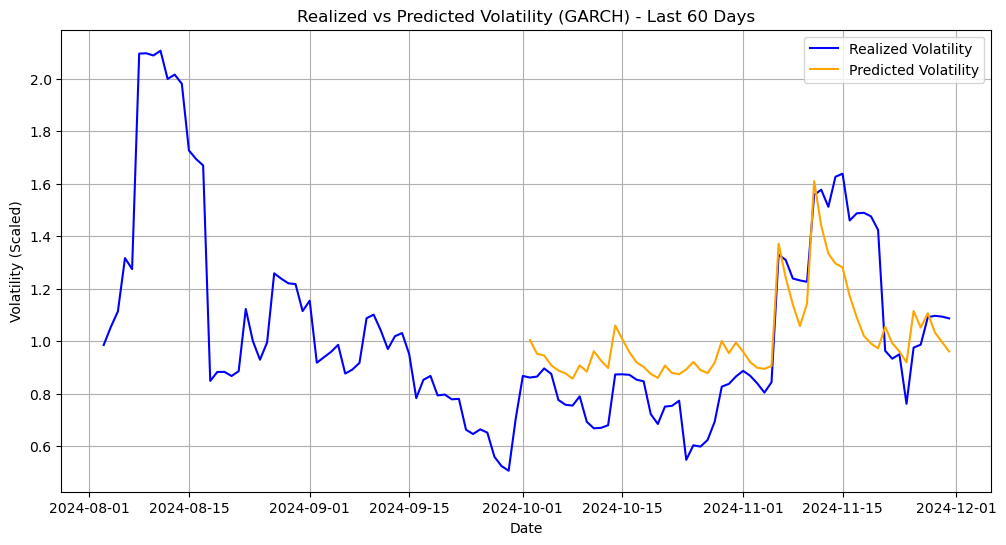

Volatility Prediction Evaluation:
Mean Squared Error (MSE): 0.0388
Root Mean Squared Error (RMSE): 0.1970
Mean Absolute Error (MAE): 0.1598
R² Score: 0.5630


In [59]:
# Load the data.
data_d = pd.read_csv('BTCUSDT_daily_2023.csv')  # Replace with your file.
data_d['timestamp'] = pd.to_datetime(data_d['timestamp'])
data_d.set_index('timestamp', inplace=True)

perform_garch_analysis(data_d,1,1)

- For the daily prediction, we implement a simple GARCH(1, 1) model with a normal distribution. We observe that the R² is not exceptionally high, but the prediction does not seem unreasonable. The trends and peaks appear to be fairly well captured. The errors are relatively low and suggest an acceptable level of error.

**Let's move on to the hourly prediction.**


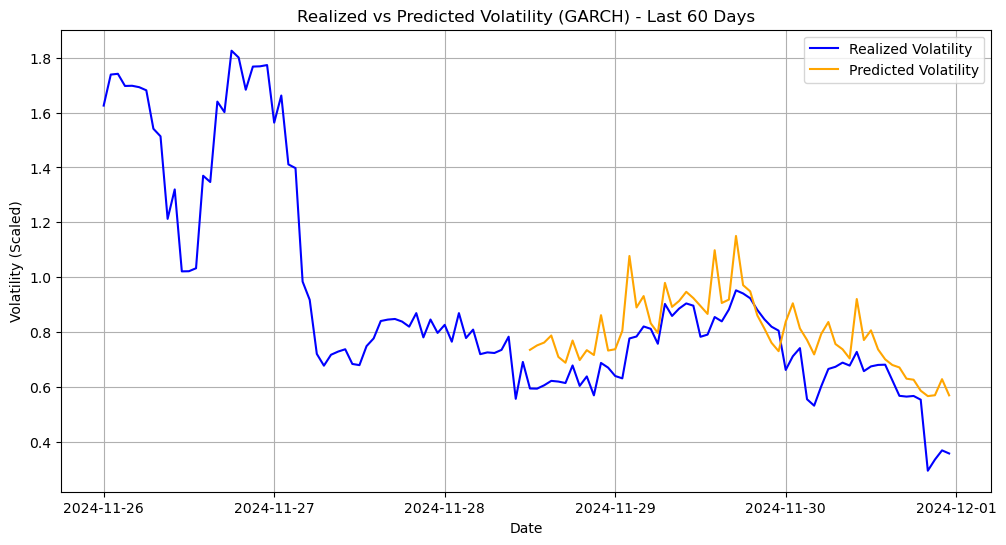

Volatility Prediction Evaluation:
Mean Squared Error (MSE): 0.0176
Root Mean Squared Error (RMSE): 0.1328
Mean Absolute Error (MAE): 0.1108
R² Score: 0.2045


In [72]:
# Load the data
data_h = pd.read_csv('BTCUSDT_hourly_2023.csv')
data_h['timestamp'] = pd.to_datetime(data_h['timestamp'])
data_h.set_index('timestamp', inplace=True)

perform_garch_analysis(data_h,2,2,'t')

Next, for the hourly prediction, the model needed improvement as the previous one yielded average results. To achieve acceptable errors and R², a more advanced model was required, specifically a GARCH(2, 2) model with a Student's t-distribution.

## **V. Dashboard**


**Open the Dashboard file and run the Streamlit module by following the instructions in the terminal.**